In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler,QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [10]:
data = pd.read_csv('penguins.csv')
data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [11]:
print(data.isnull().sum())

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [12]:
data = pd.read_csv('penguins.csv')
data = data.dropna()
data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [13]:
data = data.fillna(0)

In [14]:
data['bill_length_mm'].fillna((data['bill_length_mm'].mean()), inplace=True)
data['bill_depth_mm'].fillna((data['bill_depth_mm'].mean()), inplace=True)
data['flipper_length_mm'].fillna((data['flipper_length_mm'].mean()),inplace=True)
data['body_mass_g'].fillna((data['body_mass_g'].mean()), inplace=True)
data['sex'].fillna((data['sex'].value_counts().index[0]), inplace=True)
data.reset_index()
data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [15]:
data.loc[(data['sex'] != 'FEMALE') & (data['sex'] != 'MALE')]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [16]:
data = data.drop([4])
data.reset_index()

,index,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
4,6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
...,...,...,...,...,...,...,...,...,...,...
327,339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
328,340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
329,341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
330,342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [17]:
data = data.drop([327])
data.reset_index()

,index,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
4,6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
...,...,...,...,...,...,...,...,...,...,...
326,339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
327,340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
328,341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
329,342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [18]:
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')
data.dtypes

Unnamed: 0              int64
species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [20]:
categorical_data = data.drop(['bill_length_mm', 'bill_depth_mm','flipper_length_mm', \
'body_mass_g'], axis=1)
categorical_data.head()

,Unnamed: 0,species,island,sex,year
0,1,Adelie,Torgersen,male,2007
1,2,Adelie,Torgersen,female,2007
2,3,Adelie,Torgersen,female,2007
5,6,Adelie,Torgersen,male,2007
6,7,Adelie,Torgersen,female,2007


In [21]:
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

,Unnamed: 0,species,island,sex,year,species_cat,island_cat,sex_cat
0,1,Adelie,Torgersen,male,2007,0,2,1
1,2,Adelie,Torgersen,female,2007,0,2,0
2,3,Adelie,Torgersen,female,2007,0,2,0
5,6,Adelie,Torgersen,male,2007,0,2,1
6,7,Adelie,Torgersen,female,2007,0,2,0


In [22]:
encoded_spicies = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])
categorical_data = categorical_data.join(encoded_spicies)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)

In [26]:
categorical_data = data.drop(['bill_length_mm', 'bill_depth_mm',
'flipper_length_mm', 'body_mass_g'], axis=1)
species_count = categorical_data['species'].value_counts()
island_count = categorical_data['island'].value_counts()
sex_count = categorical_data['sex'].value_counts()
categorical_data['species_count_enc'] = categorical_data['species'].map(species_count)
categorical_data['island_count_enc'] = categorical_data['island'].map(island_count)
categorical_data['sex_count_enc'] = categorical_data['sex'].map(sex_count)
categorical_data

,Unnamed: 0,species,island,sex,year,species_count_enc,island_count_enc,sex_count_enc
0,1,Adelie,Torgersen,male,2007,145,46,167
1,2,Adelie,Torgersen,female,2007,145,46,164
2,3,Adelie,Torgersen,female,2007,145,46,164
5,6,Adelie,Torgersen,male,2007,145,46,167
6,7,Adelie,Torgersen,female,2007,145,46,164
...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,male,2009,67,122,167
340,341,Chinstrap,Dream,female,2009,67,122,164
341,342,Chinstrap,Dream,male,2009,67,122,167
342,343,Chinstrap,Dream,male,2009,67,122,167


In [29]:
def leave_one_out_mean(series):
    series = (series.sum() - series)/(len(series) - 1)
    return series

<Axes: xlabel='species', ylabel='body_mass_g'>

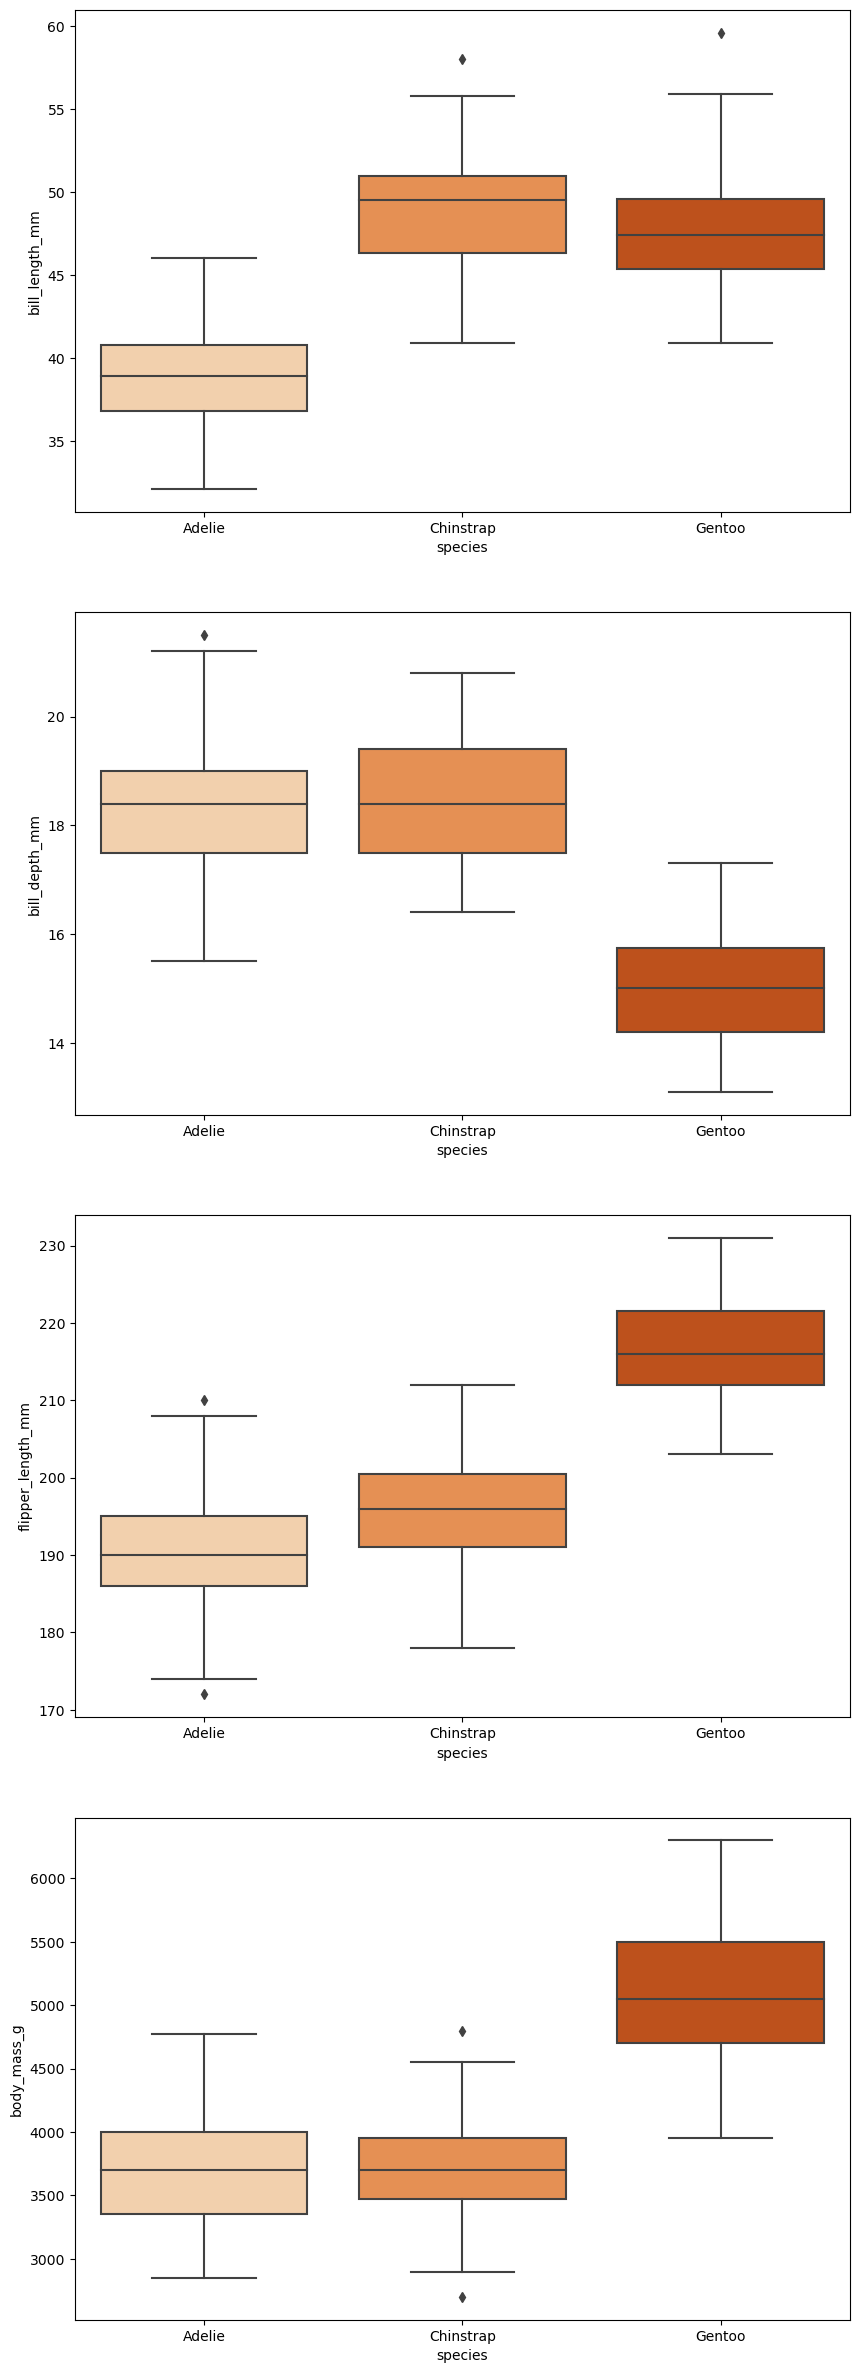

In [30]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="bill_length_mm",x="species",orient="v",ax=axes[0],palette="Oranges")
sb.boxplot(data=data,y="bill_depth_mm",x="species",orient="v",ax=axes[1],palette="Oranges")
sb.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2],palette="Oranges")
sb.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3],palette="Oranges")

In [32]:
factor = 2
upper_lim = data['bill_length_mm'].mean () + data['bill_length_mm'].std () *factor
lower_lim = data['bill_length_mm'].mean () - data['bill_length_mm'].std () *factor
no_outliers = data[(data['bill_length_mm'] < upper_lim) & (data['bill_length_mm'] > lower_lim)]
no_outliers

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
...,...,...,...,...,...,...,...,...,...
338,339,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [33]:
upper_lim = data['bill_length_mm'].quantile(.95)
lower_lim = data['bill_length_mm'].quantile(.05)
no_outliers = data[(data['bill_length_mm'] < upper_lim) & (data['bill_length_mm'] > lower_lim)]
no_outliers

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
...,...,...,...,...,...,...,...,...,...
338,339,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [34]:
bin_data = data[['bill_length_mm']]
bin_data['bill_length_bin'] = pd.cut(data['bill_length_mm'], bins=[0, 40, 50,100],
labels=["Low", "Mid", "High"])
bin_data

C:\Users\SUJAY KHOND\AppData\Local\Temp\ipykernel_3148\2011524305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['bill_length_bin'] = pd.cut(data['bill_length_mm'], bins=[0, 40, 50,100],


,bill_length_mm,bill_length_bin
0,39.1,Low
1,39.5,Low
2,40.3,Mid
5,39.3,Low
6,38.9,Low
...,...,...
339,55.8,High
340,43.5,Mid
341,49.6,Mid
342,50.8,High


In [35]:
scaled_data = data[['body_mass_g']]
print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

Mean: 4210.12084592145
Standard Deviation: 806.446273109756


In [36]:
feature_sel_data = data.drop(['species'], axis=1)
feature_sel_data["island"] = feature_sel_data["island"].cat.codes
feature_sel_data["sex"] = feature_sel_data["sex"].cat.codes
# Use 3 features
selector = SelectKBest(f_classif, k=3)
selected_data = selector.fit_transform(feature_sel_data, data['species'])
selected_data

array([[  1. ,  39.1, 181. ],
       [  2. ,  39.5, 186. ],
       [  3. ,  40.3, 195. ],
       [  6. ,  39.3, 190. ],
       [  7. ,  38.9, 181. ],
       [  8. ,  39.2, 195. ],
       [ 13. ,  41.1, 182. ],
       [ 14. ,  38.6, 191. ],
       [ 15. ,  34.6, 198. ],
       [ 16. ,  36.6, 185. ],
       [ 17. ,  38.7, 195. ],
       [ 18. ,  42.5, 197. ],
       [ 19. ,  34.4, 184. ],
       [ 20. ,  46. , 194. ],
       [ 21. ,  37.8, 174. ],
       [ 22. ,  37.7, 180. ],
       [ 23. ,  35.9, 189. ],
       [ 24. ,  38.2, 185. ],
       [ 25. ,  38.8, 180. ],
       [ 26. ,  35.3, 187. ],
       [ 27. ,  40.6, 183. ],
       [ 28. ,  40.5, 187. ],
       [ 29. ,  37.9, 172. ],
       [ 30. ,  40.5, 180. ],
       [ 31. ,  39.5, 178. ],
       [ 32. ,  37.2, 178. ],
       [ 33. ,  39.5, 188. ],
       [ 34. ,  40.9, 184. ],
       [ 35. ,  36.4, 195. ],
       [ 36. ,  39.2, 196. ],
       [ 37. ,  38.8, 190. ],
       [ 38. ,  42.2, 180. ],
       [ 39. ,  37.6, 181. ],
       [ 4

In [37]:
selected_features = pd.DataFrame(selector.inverse_transform(selected_data),
index=data.index,
columns=feature_sel_data.columns)
selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

,Unnamed: 0,bill_length_mm,flipper_length_mm
0,1.0,39.1,181.0
1,2.0,39.5,186.0
2,3.0,40.3,195.0
5,6.0,39.3,190.0
6,7.0,38.9,181.0


In [38]:
data.species

0         Adelie
1         Adelie
2         Adelie
5         Adelie
6         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 331, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']